[       pd.py:50 ] INFO: Loaded df from /Users/szhong/Downloads/bpf-study/output/bcc_delta.pkl
[       pd.py:50 ] INFO: Loaded df from /Users/szhong/Downloads/bpf-study/output/bcc_version.pkl
/tmp/ipykernel_231655/3821622465.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_version = df_version.replace({True: 0, False: 1})


,4.4,4.8,4.10,4.13,4.15,4.18,5.0,5.3,5.4,5.8,5.11,5.13,5.15,5.19,6.2,6.5,6.8
Program,,,,,,,,,,,,,,,,,
bindsnoop,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3
biolatency,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
biopattern,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
biosnoop,3,3,3,3,3,3,3,3,3,2,2,2,1,3,3,2,2
biostacks,4,4,4,4,4,4,4,4,4,3,3,3,2,5,5,2,2
biotop,5,5,5,5,5,5,5,5,5,5,5,5,4,6,6,4,4
bitesize,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
cachestat,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
capable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


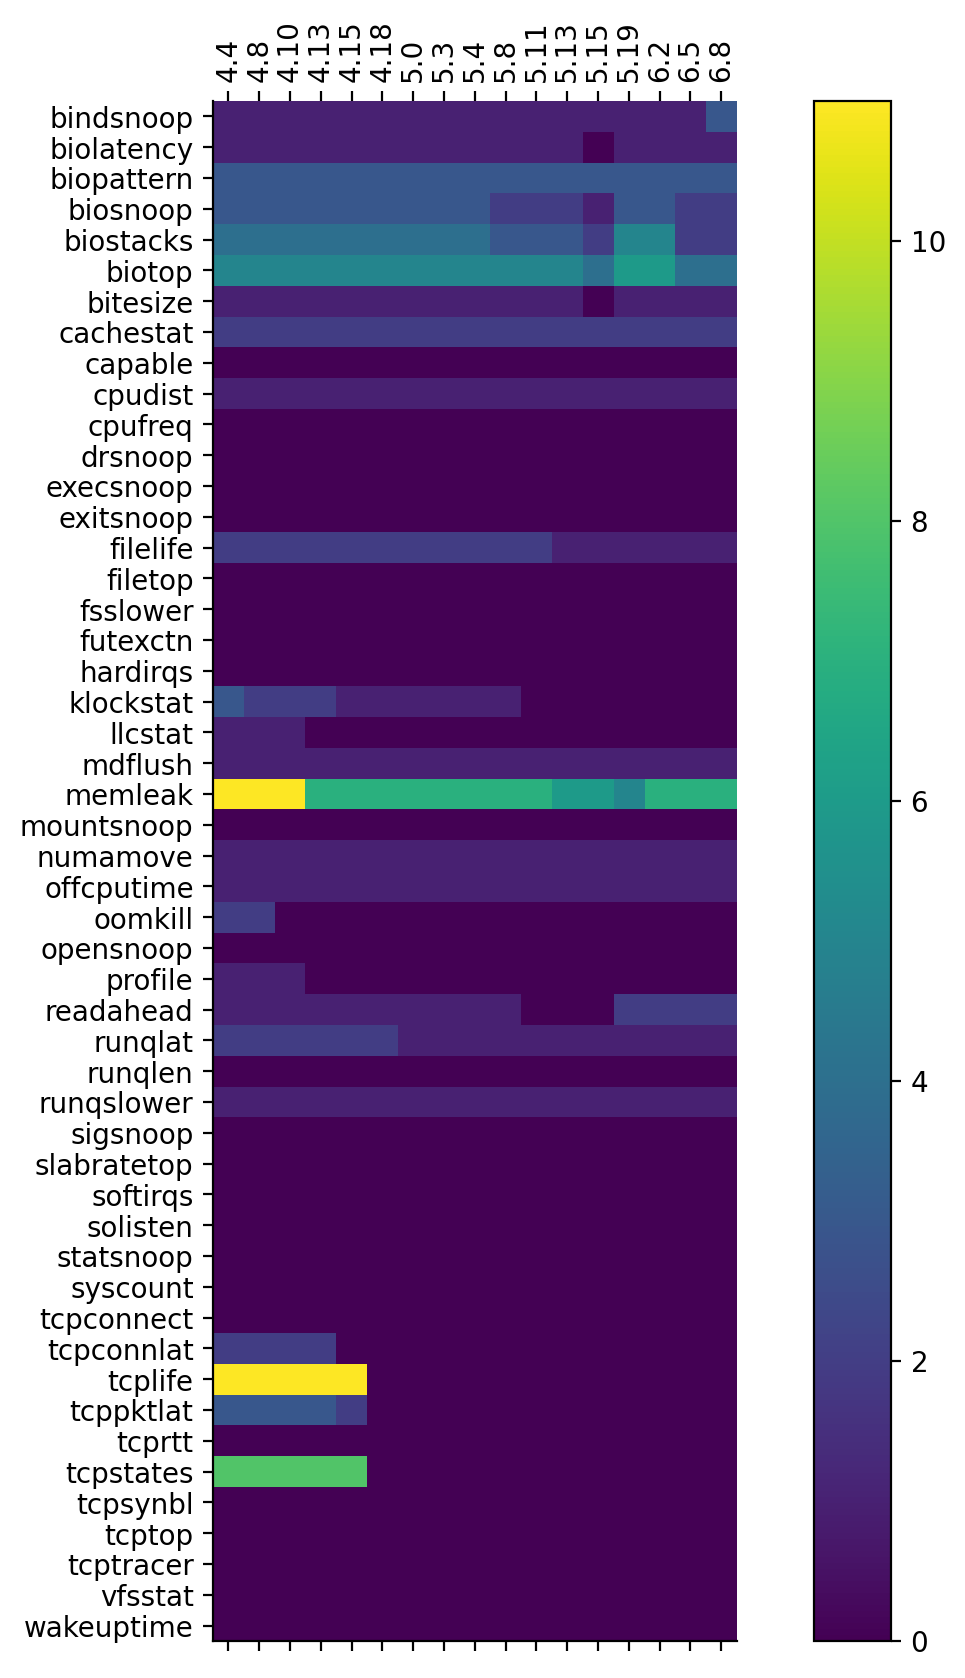

In [1]:
from depsurf.output import load_df

df_delta = load_df("bcc_delta")
df_delta = df_delta.replace({-1: 0})


df_delta = df_delta.groupby(df_delta.index.get_level_values(0)).sum()

# df_delta["Sum"] = df_delta.sum(axis=1)
# df_delta = df_delta.sort_values("Sum", ascending=False)
# df_delta


import matplotlib.pyplot as plt




df_version = load_df("bcc_version")
df_version = df_version.replace({True: 0, False: 1})
df_version = df_version.groupby(df_version.index.get_level_values(0)).sum()

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(df_version, cmap="viridis")
ax.set_xticks(range(len(df_version.columns)))
ax.set_xticklabels(df_version.columns, rotation=90)
ax.set_yticks(range(len(df_version.index)))
ax.set_yticklabels(df_version.index)
fig.colorbar(cax)

df_version

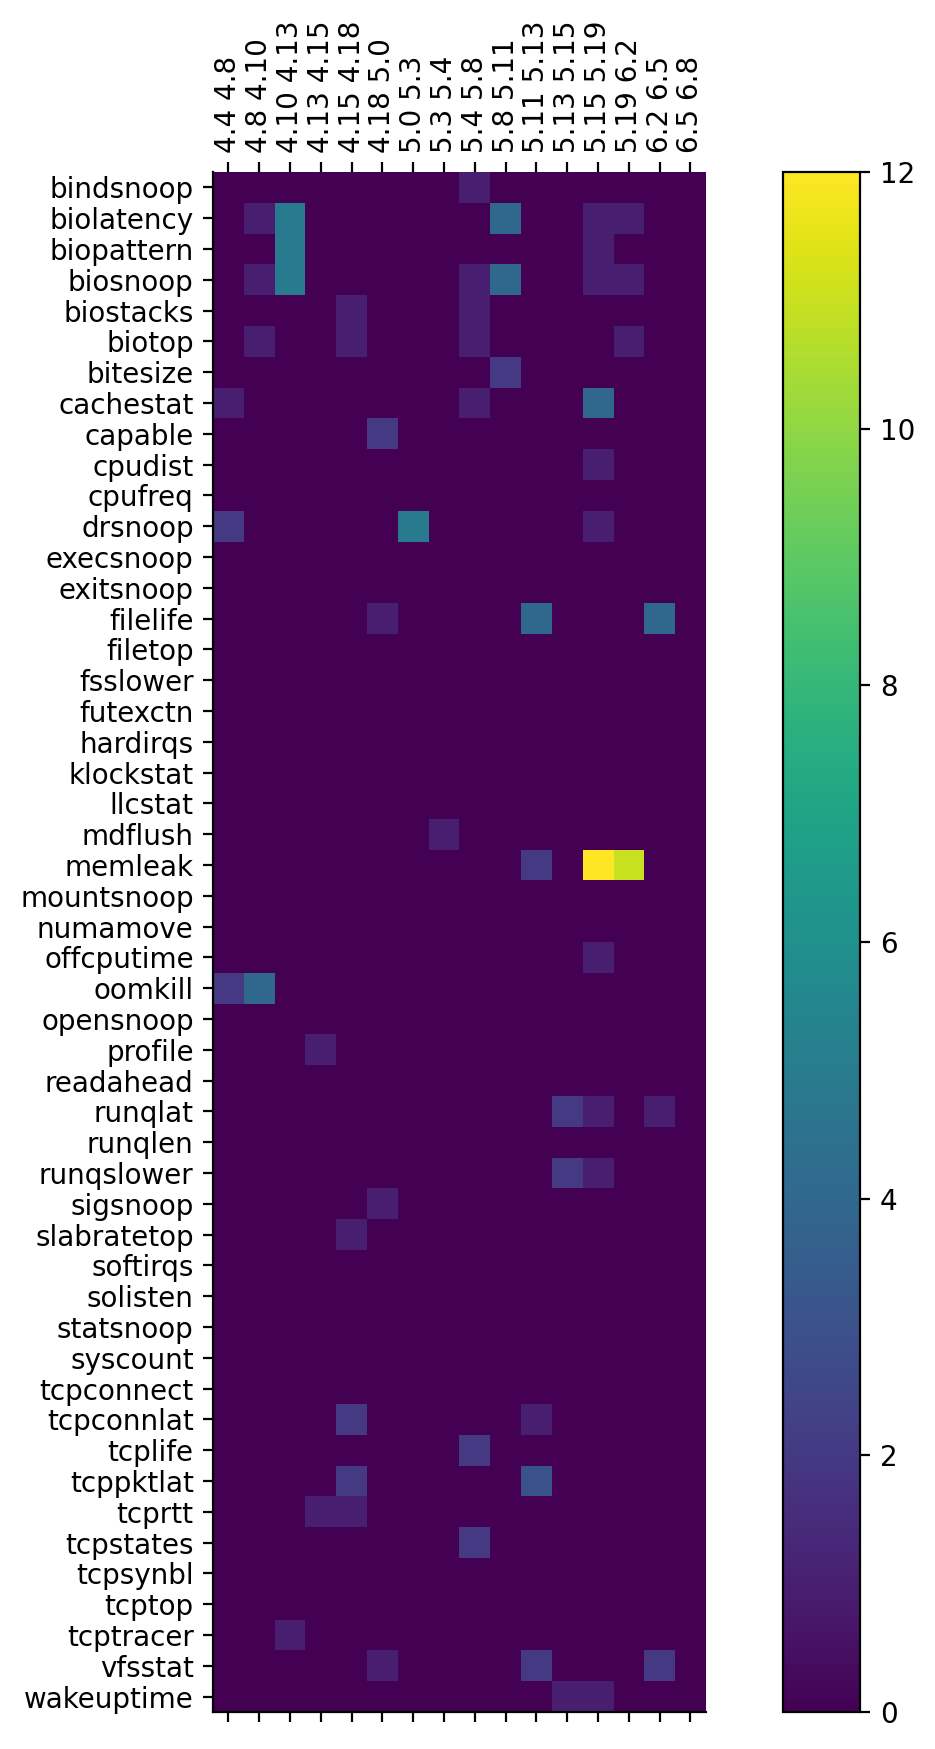

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

cax = ax.matshow(df_delta, cmap="viridis")

ax.set_xticks(range(len(df_delta.columns)))
ax.set_xticklabels(df_delta.columns.map(lambda x: " ".join(x)), rotation=90)
ax.set_yticks(range(len(df_delta.index)))
ax.set_yticklabels(df_delta.index)

fig.colorbar(cax)